Import required libraries

In [1]:
# to work with the file system and folder structure
import os
import time
import glob
import pathlib

import numpy as np # to work with arrays
import pandas as pd # to work with dataframes
import matplotlib.pyplot as plt # to plot graphs for data and accuracy
import seaborn as sns # to plot graphs for data and accuracy

Check categories of news articles available

In [2]:
os.listdir('/kaggle/input/bbc-news-summary/BBC News Summary/Summaries/')

['politics', 'sport', 'tech', 'entertainment', 'business']

Defining paths for variables for articles and summaries along with setting a list for categories of news articles

In [3]:
# Now we define paths for articles, summaries and maintain a list of categories of our data
article_path = '/kaggle/input/bbc-news-summary/BBC News Summary/News Articles'
summary_path = '/kaggle/input/bbc-news-summary/BBC News Summary/Summaries'
categories_list = ['politics', 'sport', 'tech', 'entertainment', 'business']

**purpose of the function** : to read into the folders and store articles, summaries and categories into variables.

In [4]:
# providing inputs for articles, summaries and categories
def read_in_folders(article_path, summary_path, categories_list, encoding = "ISO-8859-1"):
    articles = []
    summaries = []
    categories = []
    
    
    for category in categories_list: # category iterates over the entire list of categories one by one
        
        # store all articles & summaries in the variables respectively for a given category, recursively
        # therefore, essentially it make a list for all artivles and summaries per category, in the end it stores it for all categories
        article_paths = glob.glob(os.path.join(article_path, category, '*.txt'), recursive=True)
        summary_paths = glob.glob(os.path.join(summary_path, category, '*.txt'), recursive=True)
        
        print(f'found {len(article_paths)} in articles/{category} folder, {len(summary_paths)} in summaries/{category}')
        
        # check if number of articles & summaries are same or not
        if(len(article_paths) != len(summary_paths)):
            print('Both are not equal')
            return 
        
        # put the content of all articles per category in articles
        for index in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[index], mode = 'r', encoding = encoding) as file:
                articles.append(file.read())
                
            with open(summary_paths[index], mode = 'r', encoding = encoding) as file:
                summaries.append(file.read())
                
    return articles, summaries, categories

In [5]:
#store the return values into the variables
articles, summaries, categories = read_in_folders(article_path, summary_path, categories_list)

found 417 in articles/politics folder, 417 in summaries/politics
found 511 in articles/sport folder, 511 in summaries/sport
found 401 in articles/tech folder, 401 in summaries/tech
found 386 in articles/entertainment folder, 386 in summaries/entertainment
found 510 in articles/business folder, 510 in summaries/business


Create a dataframe to work with the data

In [6]:
#creates the dataframe df with articles, summaries and categories storeed in key value pairs
df = pd.DataFrame({'articles':articles, 'summaries':summaries, 'categories': categories},)
df


,articles,summaries,categories
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics
...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business


In [7]:
df['categories'].head()

0    politics
1    politics
2    politics
3    politics
4    politics
Name: categories, dtype: object

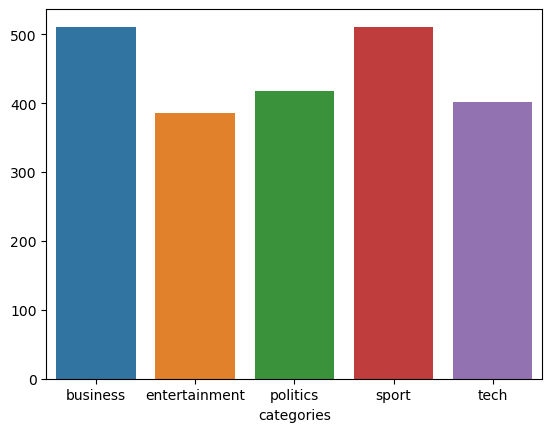

In [8]:
# group sizes by the various categories 
categ_sizes = df.groupby('categories').size() 
sns.barplot(x=categ_sizes.index, y=categ_sizes) # indexes are the different categories
plt.show()

Caclulating the number of words in each article & summary

In [9]:
# apply adds allows us to apply the lambda function and store output in the new columns into the dataframe
# x is each article, x.split() split each word in x and len returns the final number of words
df['article_len'] = df['articles'].apply(lambda x : len(x.split())) 
df['summary_len'] = df['summaries'].apply(lambda x : len(x.split()))


In [10]:
df

,articles,summaries,categories,article_len,summary_len
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics,538,192
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics,500,266
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics,540,225
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics,496,223
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics,440,185
...,...,...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business,225,90
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business,398,180
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business,322,120
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197


In [11]:
# 0 means x axis\
# check mean length of all articles per category
category_wise_len = df.groupby('categories', 0).agg({'article_len': 'mean', 'summary_len': 'mean'})
category_wise_len

,article_len,summary_len
categories,,
business,328.880392,139.929412
entertainment,330.621762,144.049223
politics,453.973621,195.709832
sport,329.262231,143.187867
tech,502.695761,213.837905


In [12]:
!nvidia-smi

Sat Apr  8 12:48:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [13]:
# !python -m pip install --upgrade pip

In [14]:
# !pip install --quiet transformers==4.5.0
# !pip install --quiet pytorch-lightning==1.2.7
# !pip install --quiet torch==1.8.0
# !pip install --quiet torchvision==0.9.0
# !pip install --quiet torchtext==0.9.0

In [15]:
!pip install --quiet transformers
!pip install --quiet pytorch-lightning
!pip install --quiet torch
!pip install --quiet torchvision
!pip install --quiet torchtext

In [16]:
import json
import torch
import pandas as pd
import numpy as np
from pathlib import Path
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.model_selection import train_test_split
from termcolor import colored
import textwrap

from transformers import (
AdamW,
T5ForConditionalGeneration,
T5TokenizerFast as T5Tokenizer)

from tqdm.auto import tqdm

In [17]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize']=16, 10

In [18]:
df

,articles,summaries,categories,article_len,summary_len
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...,politics,538,192
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ...",politics,500,266
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...,politics,540,225
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...,politics,496,223
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g...",politics,440,185
...,...,...,...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...,business,225,90
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...,business,398,180
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...,business,322,120
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ...",business,406,197


In [19]:
df = df[['articles', 'summaries']] # only keeping the columns articles and summaries

In [20]:
df

,articles,summaries
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from Â£...
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."
...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."


In [21]:
# removing non-ascii keywords from the data
df['articles']=df['articles'].str.encode('ascii', 'ignore').str.decode('ascii')
df['summaries']=df['summaries'].str.encode('ascii', 'ignore').str.decode('ascii')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df

,articles,summaries
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from 60...
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."
...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."


In [23]:
# remove null values
df = df.dropna()

In [24]:
df

,articles,summaries
0,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from 60...
1,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."
...,...,...
2220,India opens skies to competition\n\nIndia will...,India will allow domestic commercial airlines ...
2221,Yukos bankruptcy 'not US matter'\n\nRussian au...,Yukos says a US court was entitled to declare ...
2222,Survey confirms property slowdown\n\nGovernmen...,House prices were 11.8% higher on the year in ...
2223,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."


In [25]:
train_df, test_df = train_test_split(df, test_size = 0.1)

In [26]:
train_df

,articles,summaries
1841,US economy shows solid GDP growth\n\nThe US ec...,Growth was at an annual rate of 4% in the thir...
2042,Lufthansa may sue over Bush visit\n\nGerman ai...,German airline Lufthansa may sue federal agenc...
336,Brown ally rejects Budget spree\n\nChancellor ...,"But Mr Balls, a prospective Labour MP, said he..."
482,Prutton poised for lengthy FA ban\n\nSouthampt...,"He was out of order but he knows that,"" said R..."
826,Dawson set for new Wasps contract\n\nEuropean ...,European champions Wasps are set to offer Matt...
...,...,...
2043,South African car demand surges\n\nCar manufac...,"New vehicle sales jumped 22% to 449,603 from a..."
1400,Oscar nominees lack pulling power\n\nThis year...,The biggest box office hitter among this year'...
2123,Wal-Mart to pay $14m in gun suit\n\nThe world'...,"""Although Wal-Mart has suspended gun sales in ..."
1318,Microsoft gets the blogging bug\n\nSoftware gi...,Microsoft is trailing behind competitors like ...


In [27]:
class NewsSummaryDataset(Dataset):
    
    # constructor
    def __init__(
    self,
    data : pd.DataFrame,
    tokenizer : T5Tokenizer, 
    text_maxlen : int = 512,
    summary_maxlen : int = 128):
        
        self.tokenizer = tokenizer
        self.data = data
        self.text_maxlen = text_maxlen
        self.summary_maxlen = summary_maxlen
        
    #length of the data
    def __len__(self):
        return len(self.data)
    
    # obtain each data row-wise
    def __getitem__(self, index : int):
        data_row = self.data.iloc[index]
        text = data_row['articles'] # pick articles column of the row
        
        #encoding the text with tokenizer
        article_encoding = tokenizer(
            text, 
            max_length=self.text_maxlen,
            truncation=True, # if length greater than 512 remove them
            padding='max_length',
            return_attention_mask=True,
            add_special_tokens=True,
            return_tensors='pt'
            )
        
        summary_encoding = tokenizer(
            data_row['summaries'],
            max_length=self.summary_maxlen,
            truncation=True, # if length greater than 512 remove them
            padding='max_length',
            return_attention_mask=True, # return the attention mask
            add_special_tokens=True, # 
            return_tensors='pt'
            )
        
        labels = summary_encoding['input_ids']
        labels[labels == 0] = -100
        
        # take all input ids and attention masks and flatten them
        return dict(
            text=text,
            summary=data_row['summaries'],
            text_input_ids = article_encoding['input_ids'].flatten(),
            text_attention_mask = article_encoding['attention_mask'].flatten(),
            labels = labels.flatten(),
            labels_attention_mask=summary_encoding['attention_mask'].flatten()
        )

In [28]:
test_df

,articles,summaries
143,Blair ready to call election\n\nTony Blair see...,And it looked like the Labour campaign - which...
1674,"DVD review: I, Robot\n\nOnly one man recognise...",Will Smith co-stars alongside more CGI robots ...
901,Ferguson hails Man Utd's resolve\n\nManchester...,"""Roy came on and brought a bit of composure to..."
137,Brown ally rejects Budget spree\n\nChancellor ...,"But Mr Balls, a prospective Labour MP, said he..."
539,Harinordoquy suffers France axe\n\nNumber eigh...,Harinordoquy was a second-half replacement in ...
...,...,...
515,Scotland 18-10 Italy\n\nSix Chris Paterson pen...,And Scotland capitalised with a third Paterson...
1292,Norway upholds 'Napster' ruling\n\nA Norwegian...,"Frank Allan Bruvik was ordered to pay 100,000 ..."
198,"Retirement age could be scrapped\n\nThe ""myth ...",Mr Johnson told Age Concern's Age Agenda in Lo...
1392,Brits return Keane to number one\n\nBrits succ...,"The debut album, which took the best British a..."


In [29]:
class NewsSummaryDataModule(pl.LightningDataModule):
    # constructor
    def __init__(
    self,
    train_df : pd.DataFrame,
    test_df : pd.DataFrame,
    tokenizer : T5Tokenizer, 
    batch_size : int = 8,
    text_maxlen : int = 512,
    summary_maxlen : int = 128
):
            
        super().__init__()

        self.train_df = train_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.text_maxlen = text_maxlen
        self.summary_maxlen = summary_maxlen
        
    # create train data
    def setup(self, stage=None):
        self.train_dataset=NewsSummaryDataset(
            self.train_df,
            self.tokenizer,
            self.text_maxlen,
            self.summary_maxlen
            )
        
        self.test_dataset=NewsSummaryDataset(
            self.test_df,
            self.tokenizer,
            self.text_maxlen,
            self.summary_maxlen
            )
        
    # load training and testing
    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=2
        )
    
    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=2
        )

In [30]:
MODEL_NAME = 't5-base'
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

/opt/conda/lib/python3.7/site-packages/transformers/models/t5/tokenization_t5_fast.py:165: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [31]:
text_count_tokens, summary_count_tokens = [], []
for _, row in train_df.iterrows():
    text_token_count = len(tokenizer.encode(row['articles']))
    text_count_tokens.append(text_count_tokens)
    
    summary_token_count = len(tokenizer.encode(row['articles']))
    summary_count_tokens.append(summary_count_tokens)

Token indices sequence length is longer than the specified maximum sequence length for this model (678 > 512). Running this sequence through the model will result in indexing errors


In [32]:
# fig, (ax1, ax2) = plt.subplots(1, 2)
# sns.histplot(text_count_tokens, ax=ax1)
# sns.histplot(summary_count_tokens, ax=ax2)

In [33]:
epochs = 5
batch_size = 8

data_module = NewsSummaryDataModule(train_df, test_df, tokenizer)

In [34]:
data_module

Now, we create a model from this

In [35]:
# now we create a pytorch module for the model.
class NewsSummaryModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict=True)
    
    def forward(self, input_ids, attention_mask, decoder_attention_mask, labels=None):
        output = self.model(
            input_ids,
            attention_mask=attention_mask,
            labels=labels,
            decoder_attention_mask=decoder_attention_mask
        )
        
        return output.loss, output.logits # logit is predicted output
    
    # defining each training, test and validation step
    def training_step(self, batch, batch_size):
        input_ids = batch['text_input_ids']
        attention_mask = batch['text_attention_mask']
        labels = batch['labels']
        labels_attention_mask = batch['labels_attention_mask']
        
        loss, outputs = self(
            input_ids = input_ids,
            attention_mask = attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels
        )
        
        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss
    
    def test_step(self, batch, batch_size):
        input_ids = batch['text_input_ids']
        attention_mask = batch['text_attention_mask']
        labels = batch['labels']
        labels_attention_mask = batch['labels_attention_mask']
        
        loss, outputs = self(
            input_ids = input_ids,
            attention_mask = attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels
        )
        
        self.log("test_loss", loss, prog_bar=True, logger=True)
        return loss
    
    def validation_step(self, batch, batch_size):
        input_ids = batch['text_input_ids']
        attention_mask = batch['text_attention_mask']
        labels = batch['labels']
        labels_attention_mask = batch['labels_attention_mask']
        
        loss, outputs = self(
            input_ids = input_ids,
            attention_mask = attention_mask,
            decoder_attention_mask=labels_attention_mask,
            labels=labels
        )
        
        self.log("validation_loss", loss, prog_bar=True, logger=True)
        return loss
    
    def configure_optimizers(self):
        return AdamW(self.parameters(), lr = 0.0001)

In [36]:
model = NewsSummaryModel()

In [37]:
%load_ext tensorboard
%tensorboard --logdir ./lightning_logs

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [38]:
early_stopping_callback = EarlyStopping(monitor='train_loss', patience=2)

# now we create objects to monitor validation loss
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints',
    filename='best-checkpoint',
    save_top_k=1,
    verbose=True,
    monitor='train_loss',
    mode='min') # loss should be min

logger = TensorBoardLogger("lightning_logs", name = "news-summary")

trainer = pl.Trainer(
        logger = logger,
        callbacks=[early_stopping_callback, checkpoint_callback],
        max_epochs=epochs,
        gpus=1)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:479: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"


In [39]:
torch.cuda.empty_cache()

In [40]:
import gc
gc.collect()

216

In [41]:
trainer.fit(model, data_module)

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/configuration_validator.py:110: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  category=PossibleUserWarning,
/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Training: 0it [00:00, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [42]:
trained_model = NewsSummaryModel.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
trained_model.freeze()

In [43]:
def summarizeText(txt):
    article_encoding = tokenizer(
        txt,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors='pt'
    )
    
    generated_ids = trained_model.model.generate(
        input_ids=article_encoding['input_ids'],
        attention_mask=article_encoding['attention_mask'],
        max_length=150,
        num_beams=2,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True
    )
    
    preds = [
        tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
        for gen_id in generated_ids
    ]
    
    return " ".join(preds)

In [44]:
sample_row=test_df.iloc[0]
txt=sample_row['articles']
model_summary=summarizeText(txt)
txt

'Blair ready to call election\n\nTony Blair seems certain to end weeks of phoney war on Monday and announce there will be a general election on 5 May.\n\nThe date has been pencilled into the diaries of politicians and political journalists for many months and, despite occasional panics that the prime minister was on the verge of calling a snap poll, it has not shifted. Over the weeks, there have been any number of signs that 050505 was going to be the day Mr Blair would go for an historic third term. And the calling of a special political cabinet meeting has only added to the belief that the announcement is imminent. The prime minister and his campaign boss Alan Milburn have already insisted the election will be fought on the economy and what they claim is a stark choice between Labour\'s stability and investment against Tory cuts and boom and bust.\n\nAnd Chancellor Gordon Brown has stepped into the front line of the campaign - to the relief of many of his supporters in Westminster - 

In [45]:
sample_row['summaries']

'And it looked like the Labour campaign - which was already being criticised for being thrown into defensive mode by Mr Howard on issues such as immigration and health - was on the rocks.During the phoney campaign, Labour got into trouble over its central claim that Michael Howard was planning 35 bn cuts in public services.He was sacked for his gaffe, but the damage had been done and the faltering Labour campaign was back on track.Then deputy Conservative Chairman Howard Flight was reported to have suggested Mr Howard was secretly planning even bigger "cuts".The date has been pencilled into the diaries of politicians and political journalists for many months and, despite occasional panics that the prime minister was on the verge of calling a snap poll, it has not shifted.And it is certain one of the big arguments at the centre of the election battle will be around the big parties\' tax and spend policies.A second central argument will be over taxation, with the Tories claiming the Chan

In [46]:
model_summary

"And it is certain one of the big arguments at the centre of the election battle will be around the big parties' tax and spend policies.During the phoney campaign, Labour got into trouble over its central claim that Michael Howard was planning 35 bn cuts in public services.Tony Blair seems certain to end weeks of phoney war on Monday and announce there will be a general election on 5 May.The prime minister found himself struggling to explain how a smaller, slower increase in spending planned by the Tories compared to Labour's plans was a cut."